<a href="https://colab.research.google.com/github/pranamyasin/projects/blob/main/cifar10_ann_vs_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import tensorflow as tf

In [38]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [39]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [40]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [41]:
label= ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [42]:
len(label)

10

<function matplotlib.pyplot.show>

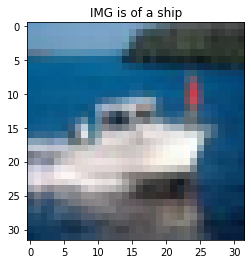

In [43]:
import matplotlib.pyplot as plt
i= np.random.randint(1,50000)
op=label[y_train[i][0]]
plt.imshow(x_train[i])
plt.title(f'IMG is of a {op}')
plt.show

In [44]:
x_train=x_train/255
x_test=x_test/255

In [45]:
#BUILD ANN MODEL

In [46]:
32*32*3 #these are the no of neuron,while 3072 are the values we consider working into

3072

In [47]:
ann =tf.keras.Sequential()
ann.add(tf.keras.layers.Flatten(input_shape=(32,32,3)))
ann.add(tf.keras.layers.Dropout(0.3))  
ann.add(tf.keras.layers.Dense(2048,activation='relu'))      #2048 is inpower of 8 for nearest to 3072
ann.add(tf.keras.layers.Dense(1024,activation='relu'))                # keeping 2 dense layer
ann.add(tf.keras.layers.Dense(10,activation='softmax'))

In [48]:
ann.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dropout_2 (Dropout)         (None, 3072)              0         
                                                                 
 dense_5 (Dense)             (None, 2048)              6293504   
                                                                 
 dense_6 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_7 (Dense)             (None, 10)                10250     
                                                                 
Total params: 8,401,930
Trainable params: 8,401,930
Non-trainable params: 0
_________________________________________________________________


In [49]:
ann.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer='adam',
             metrics=['accuracy'])

In [50]:
ann_fit=ann.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),
        callbacks= tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30))      # ACCURACY WILL REMAIN LOW SINCE IT IS ANN MODEL OF IMAGES


Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8882 - accuracy: 0.3245 - val_loss: 1.7349 - val_accuracy: 0.3639
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7004 - accuracy: 0.3877 - val_loss: 1.6099 - val_accuracy: 0.4298
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6375 - accuracy: 0.4111 - val_loss: 1.6158 - val_accuracy: 0.4264
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6004 - accuracy: 0.4254 - val_loss: 1.5567 - val_accuracy: 0.4448
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5766 - accuracy: 0.4333 - val_loss: 1.5011 - val_accuracy: 0.4667
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5519 - accuracy: 0.4442 - val_loss: 1.5249 - val_accuracy: 0.4560
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5338 - accuracy: 0.4516 - val_loss: 1.5153 - val_accuracy:

In [51]:
import pandas as pd

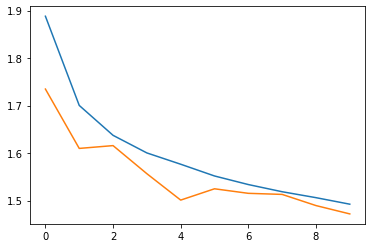

In [52]:
pd.Series(ann_fit.history['loss']).plot(kind='line')
pd.Series(ann_fit.history['val_loss']).plot(kind='line') 

In [53]:
#BUILD CNN MODEL 

In [54]:
cnn1 = tf.keras.Sequential()
cnn1.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
cnn1.add(tf.keras.layers.Dropout(0.3))  
cnn1.add(tf.keras.layers.MaxPooling2D())
cnn1.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
cnn1.add(tf.keras.layers.MaxPooling2D())
cnn1.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
cnn1.add(tf.keras.layers.Flatten())
cnn1.add(tf.keras.layers.Dense(64,activation='relu'))
cnn1.add(tf.keras.layers.Dense(10,activation='softmax'))

In [55]:
cnn1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 dropout_3 (Dropout)         (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 32)         

In [56]:
#Reduced parameters from ann being 8lakhs to cnn 71thousand

In [57]:
 cnn1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer='adam',
             metrics=['accuracy'])

In [58]:
cnn1_fit = cnn1.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),
                    callbacks= tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30))


Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5838 - accuracy: 0.4199 - val_loss: 1.3933 - val_accuracy: 0.5037
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2419 - accuracy: 0.5569 - val_loss: 1.2152 - val_accuracy: 0.5686
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1021 - accuracy: 0.6100 - val_loss: 1.1307 - val_accuracy: 0.6041
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0125 - accuracy: 0.6442 - val_loss: 1.0231 - val_accuracy: 0.6492
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9480 - accuracy: 0.6657 - val_loss: 1.0727 - val_accuracy: 0.6161
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8988 - accuracy: 0.6839 - val_loss: 0.9879 - val_accuracy: 0.6547
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8584 - accuracy: 0.6984 - val_loss: 0.9328 - val_accuracy:

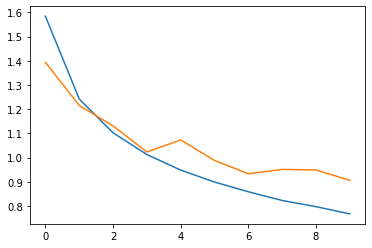

In [59]:
pd.Series(cnn1_fit.history['loss']).plot(kind='line')
pd.Series(cnn1_fit.history['val_loss']).plot(kind='line') 

In [60]:
# Accuracy gets increased with use of CNN (from 47 in ANN to 68 in CNN)

In [61]:
!nvidia-smi

Wed Jul 20 08:56:40 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    29W /  70W |   5036MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------